# Car Purchase Prediction

## Problem Statement: 
The model should predict the total amount customers are willing to pay for the new car. This information will be used by the company to do the targeted marketing based on the customer profile.

You are given the following attributes:
Customer Name
Customer e-mail
Country
Gender
Age
Annual Salary 
Credit Card Debt 
Net Worth (Asset – Liabilities)

### 1)Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### 2 ) Importing dataset & Exploratory Data Analysis

In [125]:
data=pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [126]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [127]:
data.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,USA,1,47,61370.67766,9391.341628,462946.4924,45107.22566


In [128]:
data.shape

(500, 9)

In [129]:
data.dtypes

Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [131]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [132]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

### 3)Univariate Data Analysis
    Irrelevant columns: Name, Email
    Categorical Variables: Frequency table or Bar chart
    Continuous Variables: Box plot or histogram

USA    500
Name: Country, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
1    253
0    247
Name: Gender, dtype: int64
AxesSubplot(0.547727,0.125;0.352273x0.755)


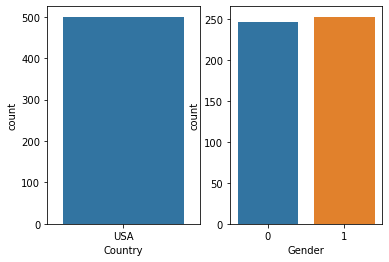

In [133]:
#Categorical : COUNTRTY GENDER
# data['Country'].value_counts().plot(kind='bar', ax=axis[0])

j=0
fig,axis=plt.subplots(1,2)
# fig.suptitle("Freqency table and bar chart of column country")

for i in data.columns[2:4]:
    print(data[i].value_counts())
    print(sns.countplot(data[i],ax=axis[j]))
    j=j+1

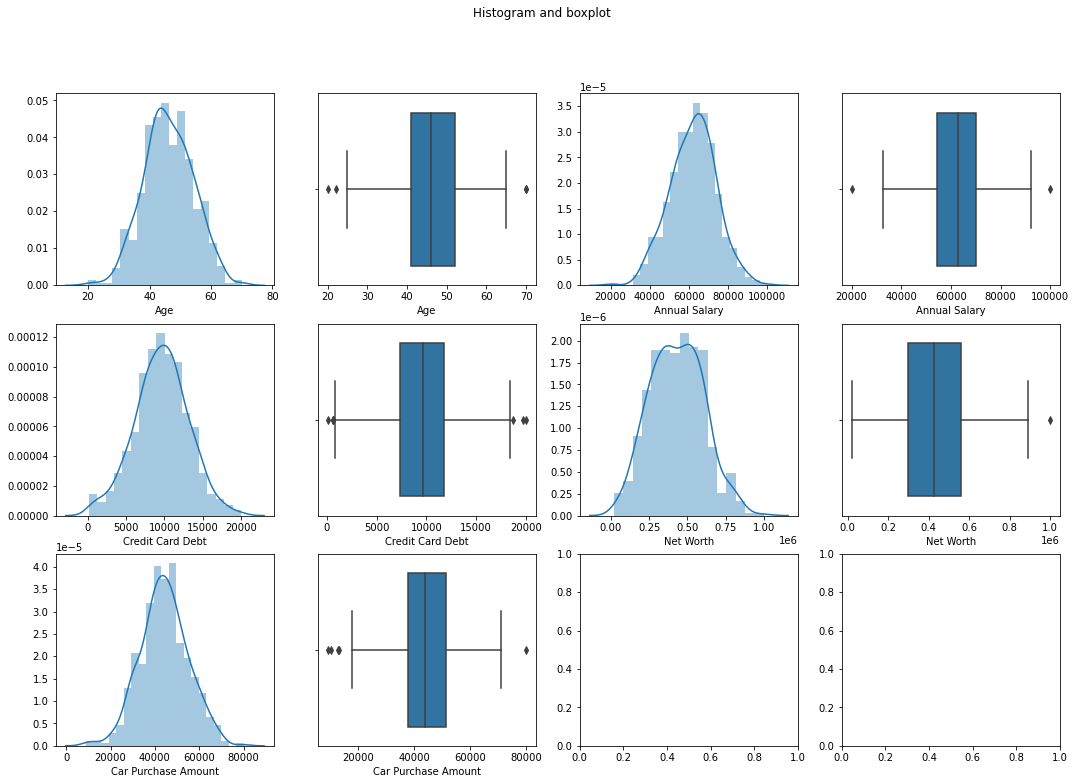

In [134]:
#Continuous : AGE, ANNUAL SALARY, CREDIT CARD DEBT, NET WORTH, CAR PURCHASE AMOUNT

fig, axis= plt.subplots(3,4, figsize=(18,12))
fig.suptitle("Histogram and boxplot")
j=0
k=0
for i in data.columns[4:]:
    if(k%2==0):
        sns.distplot(data[i], ax=axis[j,0])
        sns.boxplot(data[i], ax=axis[j,1])
    else:
        sns.distplot(data[i], ax=axis[j,2])
        sns.boxplot(data[i], ax=axis[j,3])
        j=j+1
    k=k+1

In [140]:
#Normality test
for i in data.columns[4:]:
    stat,p=normaltest(data[i])
    print("statistics: %.3f, p val: %.3f" %(stat,p))
    alpha=0.05
    print(i, ": Normal") if p>alpha else print(i, " not normal")

statistics: 0.068, p val: 0.967
Age : Normal
statistics: 0.932, p val: 0.628
Annual Salary : Normal
statistics: 0.641, p val: 0.726
Credit Card Debt : Normal
statistics: 4.746, p val: 0.093
Net Worth : Normal
statistics: 1.204, p val: 0.548
Car Purchase Amount : Normal


### 4) Bivariate Analysis 
    Correlation matrix
    pairplot or heatmap

In [141]:
data.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.066488,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.066488,1.000000,0.000361,0.031748,0.021794,0.633273
Annual Salary,-0.036499,0.000361,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.031748,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.021794,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.633273,0.617862,0.028882,0.488580,1.000000


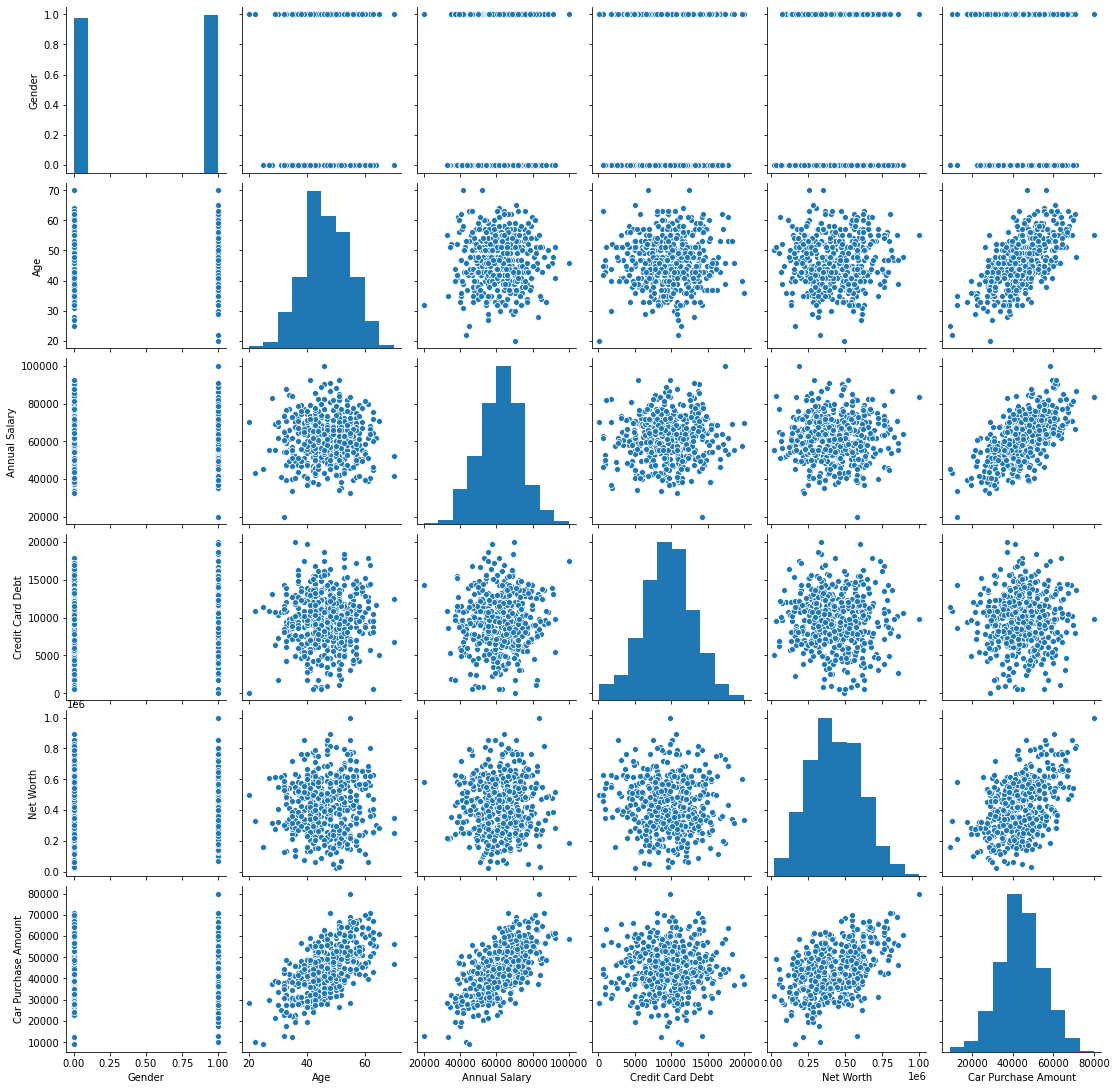

In [142]:
sns.pairplot(data)

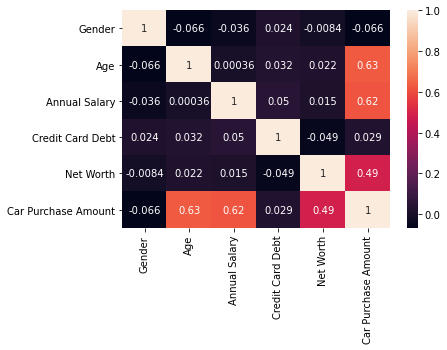

In [143]:
sns.heatmap(data.corr(), annot=True)

### 5)Data Preparation
    Dropping irrelevant columns: Name, email, gender, credit card debt
    No missing val treatment required
    No Outlier treatment required
    Creating test train dataset

In [144]:
df=data.drop(['Customer Name','Customer e-mail','Country'], axis=1)
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [145]:
X=df.iloc[:,:df.shape[1]-1] #independent variables
Y=df.iloc[:, df.shape[1]-1] #dependent variable

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((400, 5), (100, 5), (400,), (100,))

### 6)Model

In [146]:
model=LinearRegression()
model.fit(X_train, Y_train)
model.intercept_, model.coef_

(-42076.72496001253,
 array([3.42059084e+01, 8.39337582e+02, 5.62064521e-01, 4.70028401e-03,
        2.89730800e-02]))

In [149]:
Y_pred=model.predict(X_test)
np.stack((Y_pred, Y_test), axis=1)

array([[39003.00084415, 38955.21919   ],
       [43203.89808004, 43401.56612   ],
       [29543.73079521, 29417.64694   ],
       [52439.01382905, 52150.41786   ],
       [38677.30366518, 38243.06228   ],
       [52788.60271269, 53017.26723   ],
       [60922.42671761, 60526.97788   ],
       [59596.34616067, 59538.40327   ],
       [37706.39436145, 37714.31659   ],
       [31508.55427646, 31300.54347   ],
       [46830.30013498, 46846.7305    ],
       [57135.34380543, 56973.18105   ],
       [53666.17127935, 53993.44322   ],
       [70660.09997884, 70878.29664   ],
       [27552.38221243, 27889.95197   ],
       [31366.8596914 , 31526.04931   ],
       [47712.72517456, 47979.48549   ],
       [58967.67520742, 58667.06865   ],
       [42381.91125901, 42369.64247   ],
       [10183.81037496, 10092.22509   ],
       [48125.85236797, 48518.90163   ],
       [37097.01030293, 37183.10293   ],
       [46574.04028914, 46325.50959   ],
       [27362.43289273, 27586.71854   ],
       [68662.10

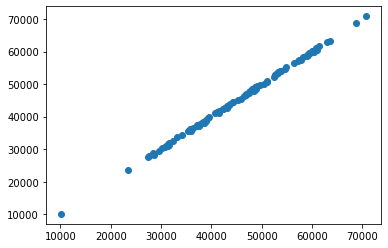

In [150]:
plt.scatter(Y_pred,Y_test)

### 7)Performance

In [157]:
r2=r2_score(Y_test, Y_pred)
r2

0.9994880699639492

In [159]:
n=X_test.shape[0] #sample size
p=X_test.shape[1] #independent var
adj_r2= 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.9994608396428827

## Decision Tree Regression

In [160]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [165]:
y_pred=model.predict(X_test)
r2=r2_score(Y_test,Y_pred)
adj_r2= 1-((1-r2)*(n-1)/(n-p-1))

r2, adj_r2

(0.882824000141545, 0.8765912341916272)

## Random Forest

In [175]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators= 10, random_state=0)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [176]:
Y_pred=model.predict(X_test)
r2=r2_score(Y_test,Y_pred)
adj_r2= 1-((1-r2)*(n-1)/(n-p-1))

r2, adj_r2

(0.958908230162435, 0.9567224977242667)